In [34]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [45]:
from tensorflow.keras.preprocessing.image import load_img

In [35]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [36]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [37]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [38]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [39]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [40]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [41]:

def extract_features(images):
    features = []
    failed_images = []
    
    for i, image in enumerate(tqdm(images, desc="Processing images")):
        try:
            # Load image with specified target size and color mode
            img = load_img(image, target_size=(48, 48), color_mode='grayscale')
            # Convert to numpy array
            img = np.array(img)
            # Normalize pixel values to 0-1 range
            img = img / 255.0
            features.append(img)
        except Exception as e:
            print(f"❌ Error loading image {image}: {e}")
            failed_images.append(image)
            continue
    
    if failed_images:
        print(f"⚠️  Failed to load {len(failed_images)} images out of {len(images)}")
    
    features = np.array(features)
    # Reshape for CNN: (samples, height, width, channels)
    features = features.reshape(len(features), 48, 48, 1)
    
    print(f"✅ Successfully extracted features from {len(features)} images")
    print(f"📊 Features shape: {features.shape}")
    
    return features

In [53]:
import cv2
import numpy as np
from tqdm import tqdm

def extract_features(image_paths):
   features = []
   for image_path in tqdm(image_paths, desc="Processing images"):
       try:
           img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
           if img is not None:
               img = cv2.resize(img, (48, 48))
               img = img.astype('float32') / 255.0
               features.append(img.flatten())
       except Exception as e:
           print(f"❌ Error loading image {image_path}: {str(e)}")
   return np.array(features)

# Extract features with progress tracking
print("🔄 Extracting training features...")
train_features = extract_features(train['image'].values)
print("🔄 Extracting test features...")
test_features = extract_features(test['image'].values)
# Additional debugging information
print(f"\n📈 Training set: {len(train_features)} samples")
print(f"📈 Test set: {len(test_features)} samples")
print(f"🎯 Unique labels in training: {train['label'].nunique()}")
print(f"🎯 Label distribution in training:\n{train['label'].value_counts()}")

🔄 Extracting training features...


Processing images: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 28821/28821 [05:29<00:00, 87.58it/s]


🔄 Extracting test features...


Processing images: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 7066/7066 [01:25<00:00, 82.85it/s]


📈 Training set: 28821 samples
📈 Test set: 7066 samples
🎯 Unique labels in training: 7
🎯 Label distribution in training:
label
happy       7164
neutral     4982
sad         4938
fear        4103
angry       3993
surprise    3205
disgust      436
Name: count, dtype: int64


In [47]:
print(train['image'].head())


0        images/train\angry\0.jpg
1        images/train\angry\1.jpg
2       images/train\angry\10.jpg
3    images/train\angry\10002.jpg
4    images/train\angry\10016.jpg
Name: image, dtype: object


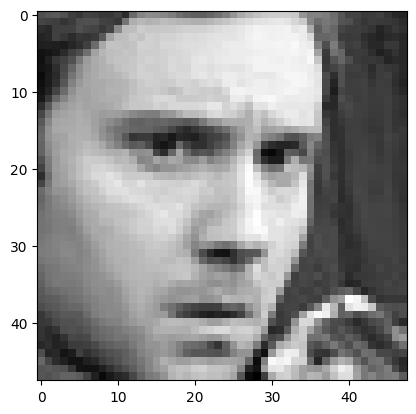

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load and display the image
img_path = train['image'][0]
img = mpimg.imread(img_path)

# Convert to grayscale if it's RGB
if len(img.shape) == 3:
    img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])

plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(train['label'])

In [ ]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

In [ ]:
model = Sequential()
# convolutional Layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# import numpy as np
# from tensorflow.keras.utils import to_categorical

# # Current shapes
# print("Original y_train shape:", y_train.shape)
# print("Original y_test shape:", y_test.shape)

# # Check what the labels actually contain
# print("Sample of y_train[0]:")
# print(y_train[0])
# print("\nUnique values in y_train:")
# print(np.unique(y_train))

# # Solution 1: If labels are incorrectly shaped one-hot vectors
# # Convert (samples, 7, 7, 7) to (samples, 7) by taking the first slice
# if y_train.shape == (y_train.shape[0], 7, 7, 7):
#     # Take only the first dimension of the extra axes
#     y_train_fixed = y_train[:, :, 0, 0]  # Shape: (samples, 7)
#     y_test_fixed = y_test[:, :, 0, 0]    # Shape: (samples, 7)
    
#     print("After first fix - y_train shape:", y_train_fixed.shape)
#     print("After first fix - y_test shape:", y_test_fixed.shape)
    
#     # Check if these look like proper one-hot vectors
#     print("Sample y_train_fixed[0]:", y_train_fixed[0])
#     print("Sum of first sample:", np.sum(y_train_fixed[0]))
    
#     # If they're proper one-hot vectors (sum should be 1), use them
#     if np.allclose(np.sum(y_train_fixed, axis=1), 1):
#         y_train = y_train_fixed
#         y_test = y_test_fixed
#         print("Using one-hot encoded labels")
#     else:
#         # If not proper one-hot, they might be class indices
#         # Convert to integers first, then to one-hot
#         y_train_int = np.argmax(y_train_fixed, axis=1)
#         y_test_int = np.argmax(y_test_fixed, axis=1)
#         y_train = to_categorical(y_train_int, num_classes=7)
#         y_test = to_categorical(y_test_int, num_classes=7)
#         print("Converted to proper one-hot encoding")

# # Solution 2: If the above doesn't work, try flattening and reshaping
# # This handles cases where labels might be stored incorrectly
# else:
#     # Flatten the labels and take first 7 elements for each sample
#     y_train_flat = y_train.reshape(y_train.shape[0], -1)
#     y_test_flat = y_test.reshape(y_test.shape[0], -1)
    
#     # Take first 7 elements (assuming they contain the class info)
#     y_train = y_train_flat[:, :7]
#     y_test = y_test_flat[:, :7]

# print("Final y_train shape:", y_train.shape)
# print("Final y_test shape:", y_test.shape)
# print("Sample final y_train[0]:", y_train[0])

# # Verify the labels are properly formatted
# print("Sum of first few samples:", np.sum(y_train[:5], axis=1))

# # Now compile and train the model
# model.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# # Train the model
# history = model.fit(
#     x=x_train, 
#     y=y_train, 
#     batch_size=128, 
#     epochs=100, 
#     validation_data=(x_test, y_test)
# )

In [ ]:
# model_json = model.to_json()
# with open("facialemotionmodel.json","w") as json_file:
#      json_file.write(model_json)
# model.save("facialemotionmodel.h5")

In [1]:
from tensorflow.keras.models import model_from_json

In [2]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [3]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [26]:
from PIL import Image
import numpy as np

def ef(image):
    # Load image using PIL
    img = Image.open(image).convert('L')  # 'L' for grayscale
    
    # Resize to 48x48 if needed
    img = img.resize((48, 48))
    
    # Convert to numpy array
    feature = np.array(img)
    
    # Normalize pixel values (0-255 to 0-1)
    feature = feature.astype('float32') / 255.0
    
    # Reshape for model input
    feature = feature.reshape(1, 48, 48, 1)
    return feature

original image is =  images/train/angry/22.jpg
1/1 [==============================] - 0s 59ms/step
model prediction is =  angry


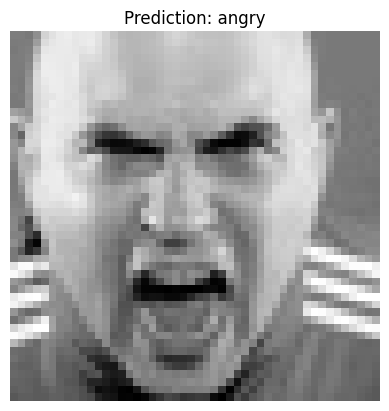

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Your existing code
image = "images/train/angry/22.jpg"
print("original image is = ", image)
img = ef(image)
pred = model.predict(img)
pred = label[np.argmax(pred)]
print("model prediction is = ", pred)

# Fix: Load and display the image file
original_img = mpimg.imread(image)
plt.imshow(original_img, cmap='gray')  # Use cmap='gray' if it's grayscale
plt.title(f"Prediction: {pred}")
plt.axis('off')
plt.show()

original image is =  images/train/sad/3.jpg
1/1 [==============================] - 0s 54ms/step
model prediction is =  sad


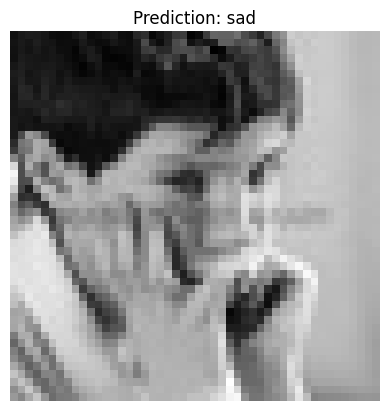

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Your existing code
image = "images/train/sad/3.jpg"
print("original image is = ", image)
img = ef(image)
pred = model.predict(img)
pred = label[np.argmax(pred)]
print("model prediction is = ", pred)

# Fix: Load and display the image file
original_img = mpimg.imread(image)
plt.imshow(original_img, cmap='gray')  # Use cmap='gray' if it's grayscale
plt.title(f"Prediction: {pred}")
plt.axis('off')
plt.show()

original image is =  images/train/fear/17.jpg
1/1 [==============================] - 0s 43ms/step
model prediction is =  fear


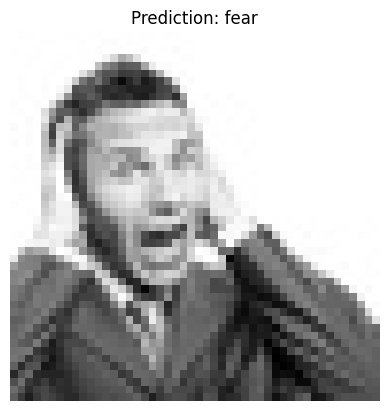

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Your existing code
image = "images/train/fear/17.jpg"
print("original image is = ", image)
img = ef(image)
pred = model.predict(img)
pred = label[np.argmax(pred)]
print("model prediction is = ", pred)

# Fix: Load and display the image file
original_img = mpimg.imread(image)
plt.imshow(original_img, cmap='gray')  # Use cmap='gray' if it's grayscale
plt.title(f"Prediction: {pred}")
plt.axis('off')
plt.show()

original image is =  images/train/disgust/388.jpg
1/1 [==============================] - 0s 37ms/step
model prediction is =  disgust


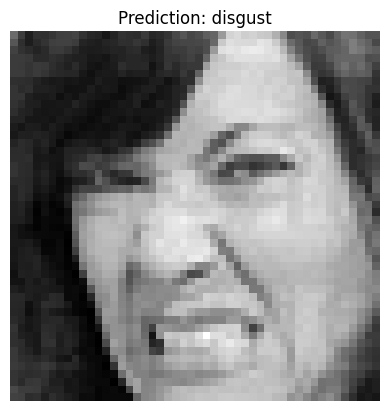

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Your existing code
image = "images/train/disgust/388.jpg"
print("original image is = ", image)
img = ef(image)
pred = model.predict(img)
pred = label[np.argmax(pred)]
print("model prediction is = ", pred)

# Fix: Load and display the image file
original_img = mpimg.imread(image)
plt.imshow(original_img, cmap='gray')  # Use cmap='gray' if it's grayscale
plt.title(f"Prediction: {pred}")
plt.axis('off')
plt.show()

original image is =  images/train/happy/28.jpg
1/1 [==============================] - 0s 29ms/step
model prediction is =  happy


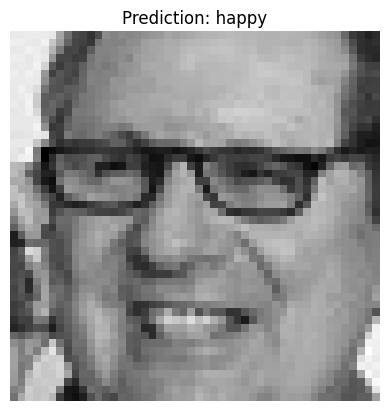

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Your existing code
image = "images/train/happy/28.jpg"
print("original image is = ", image)
img = ef(image)
pred = model.predict(img)
pred = label[np.argmax(pred)]
print("model prediction is = ", pred)

# Fix: Load and display the image file
original_img = mpimg.imread(image)
plt.imshow(original_img, cmap='gray')  # Use cmap='gray' if it's grayscale
plt.title(f"Prediction: {pred}")
plt.axis('off')
plt.show()

original image is =  images/train/neutral/11.jpg
1/1 [==============================] - 0s 28ms/step
model prediction is =  neutral


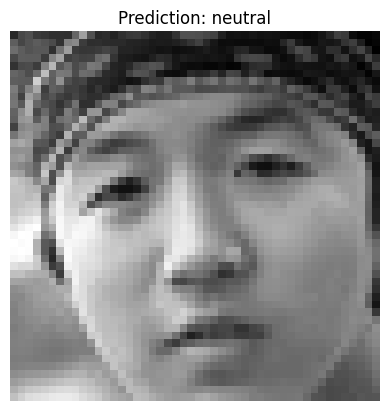

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Your existing code
image = "images/train/neutral/11.jpg"
print("original image is = ", image)
img = ef(image)
pred = model.predict(img)
pred = label[np.argmax(pred)]
print("model prediction is = ", pred)

# Fix: Load and display the image file
original_img = mpimg.imread(image)
plt.imshow(original_img, cmap='gray')  # Use cmap='gray' if it's grayscale
plt.title(f"Prediction: {pred}")
plt.axis('off')
plt.show()

original image is =  images/train/surprise/29.jpg
1/1 [==============================] - 0s 29ms/step
model prediction is =  surprise


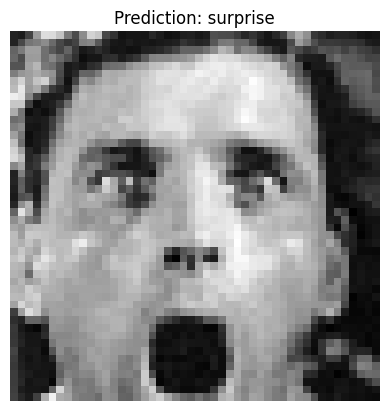

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Your existing code
image = "images/train/surprise/29.jpg"
print("original image is = ", image)
img = ef(image)
pred = model.predict(img)
pred = label[np.argmax(pred)]
print("model prediction is = ", pred)

# Fix: Load and display the image file
original_img = mpimg.imread(image)
plt.imshow(original_img, cmap='gray')  # Use cmap='gray' if it's grayscale
plt.title(f"Prediction: {pred}")
plt.axis('off')
plt.show()

In [10]:
!pip install Pillow

   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.0 MB ? eta -:--:--
   --- ------------------------------------ 0.5/7.0 MB 840.2 kB/s eta 0:00:08
   ---- ----------------------------------- 0.8/7.0 MB 1.2 MB/s eta 0:00:06
   ------ --------------------------------- 1.0/7.0 MB 1.4 MB/s eta 0:00:05
   ------- -------------------------------- 1.3/7.0 MB 1.1 MB/s eta 0:00:06
   --------- ------------------------------ 1.6/7.0 MB 1.3 MB/s eta 0:00:05
   ---------- ----------------------------- 1.8/7.0 MB 1.3 MB/s eta 0:00:05
   ------------ --------------------------- 2.1/7.0 MB 1.3 MB/s eta 0:00:04
   ------------- -------------------------- 2.4/7.0 MB 1.3 MB/s eta 0:00:04
   --------------- ------------------------ 2.6/7.0 MB 1.2 MB/s eta 0:00:04
   ---------------- ----------------------- 2.9/7.0 MB 1.2 MB/s eta 0:00:04
   ------------------ ---------

In [ ]:
!pip list | findstr keras
!pip list | findstr tensorflow


In [ ]:
!pip install keras==2.10.0 tensorflow==2.10.0

In [7]:
!pip install numpy==1.23.5 tensorflow==2.10.0 keras==2.10.0


In [5]:
!pip uninstall opencv-contrib-python -y
!pip install opencv-contrib-python==4.7.0.72


Found existing installation: opencv-contrib-python 4.12.0.88
Uninstalling opencv-contrib-python-4.12.0.88:
  Successfully uninstalled opencv-contrib-python-4.12.0.88
   ---------------------------------------- 0.0/44.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/44.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/44.9 MB 764.3 kB/s eta 0:00:59
    --------------------------------------- 0.8/44.9 MB 1.0 MB/s eta 0:00:44
    --------------------------------------- 1.0/44.9 MB 1.2 MB/s eta 0:00:37
   - -------------------------------------- 1.3/44.9 MB 1.1 MB/s eta 0:00:39
   - -------------------------------------- 1.6/44.9 MB 1.1 MB/s eta 0:00:39
   - -------------------------------------- 1.8/44.9 MB 1.2 MB/s eta 0:00:36
   - -------------------------------------- 1.8/44.9 MB 1.2 MB/s eta 0:00:36
   -- ------------------------------------- 2.4/44.9 MB 1.2 MB/s eta 0:00:37
   -- 

In [14]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 989.2 kB/s eta 0:00:08
   -- ------------------------------------- 0.5/8.1 MB 989.2 kB/s eta 0:00:08
   --- ------------------------------------ 0.8/8.1 MB 1.0 MB/s eta 0:00:08
   ----- ---------------------------------- 1.0/8.1 MB 1.0 MB/s eta 0:00:07
   ------ --------------------------------- 1.3/8.1 MB 1.1 MB/s eta 0:00:07
   ------- -------------------------------- 1.6/8.1 MB 1.0 MB/s eta 0:00:07
   --------- ------------------------------ 1.8/8.1 MB 1.1 MB/s eta 0:00:06
   ---------- ----------------------------- 2.1/8.1 MB 1.0 MB/s eta 0:00:06
   ----------- ---------------------------- 2.4/8.1 MB 1.1 MB/s eta 0:00:06
   ------------- -------------------------- 2.6/8.1 MB 1.1 MB/s eta 0:00:06
   -------------- -----------